In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pyBigWig as pbw
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

In [78]:
def adjust_median(wps_array):
    """
    running median filter
    """
    rolling_median = pd.Series(wps_array)\
            .rolling(window = 1000)\
            .median()
    adjusted_wps = np.nan_to_num(wps_array - rolling_median)
    return adjusted_wps

def find_peak_region(wps):
    """
    given a wps array, output list of cooridinate of:
    start and end of peaks
    looking for the positions that across 0 in the de-noised signal
    """
    signs = np.sign(wps)
    signs[signs==0] = -1
    start = np.where(np.diff(signs)>0)[0]
    end = np.where(np.diff(signs)<0)[0]
    return start, end


def merge_peaks(peak_start, peak_end):
    new_start = []
    new_end = []
    tolerance_unprotected = 5
    i = 0
    while i < len(peak_start)-2:
        new_start.append(peak_start[i])
        j = i
        while j < len(peak_start)-2 and peak_start[j+1] - peak_end[j] <= tolerance_unprotected:
            j += 1
        new_end.append(peak_end[j])
        j += 1
        i = j
    new_start.append(peak_start[i])
    new_end.append(peak_end[i])
    return np.array(new_start), np.array(new_end)

def maxSubArray(ls):
    '''
    #https://gist.github.com/alabid/3734606
    '''
    if len(ls) == 0:
       raise Exception("Array empty") # should be non-empty

    runSum = maxSum = ls[0]
    i = 0
    start = finish = 0

    for j in range(1, len(ls)):
    	if ls[j] > (runSum + ls[j]):
            runSum = ls[j]
            i = j
        else:
            runSum += ls[j]

        if runSum > maxSum:
            maxSum = runSum
            start = i
            finish = j

    return start, finish


def adjust_peaks(wps, peak_start, peak_end):
    sub_wps = wps[peak_start:peak_end]
    median_sub_wps = np.median(sub_wps)
    adjusted_sub_wps = sub_wps - median_sub_wps
    return adjusted_sub_wps

In [42]:
bw_file = '/stor/work/Lambowitz/cdw2854/plasmaDNA/genomeWPS/bigWig_files/P1022_1_S3.5.Long.bigWig'
bw = pbw.open(bw_file)
chrom, length = bw.chroms().items()[0]
wps = np.array(bw.values(chrom,0,length))

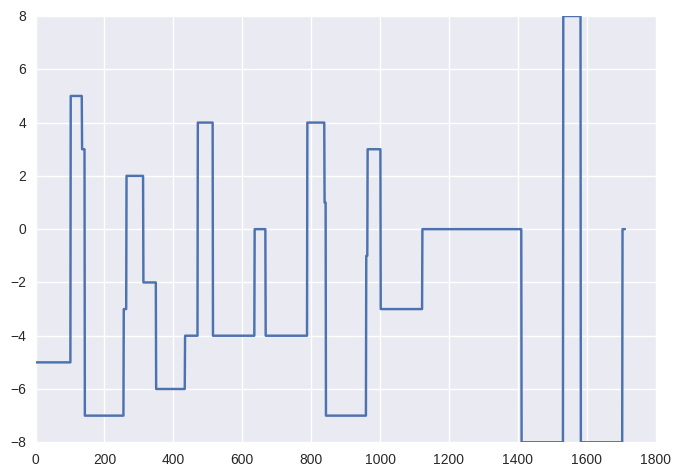

In [32]:
plt.plot(wps[89616305:89618017])

In [74]:
wps = adjust_median(wps)
wps = savgol_filter(wps, window_length = 21, polyorder=2)

In [79]:
start, end = find_peak_region(wps)
start, end = merge_peaks(start, end)

In [80]:
ws, we = 89616305, 89618017
index = (start > ws)&(start < we)
start = start[index]
end = end[index]

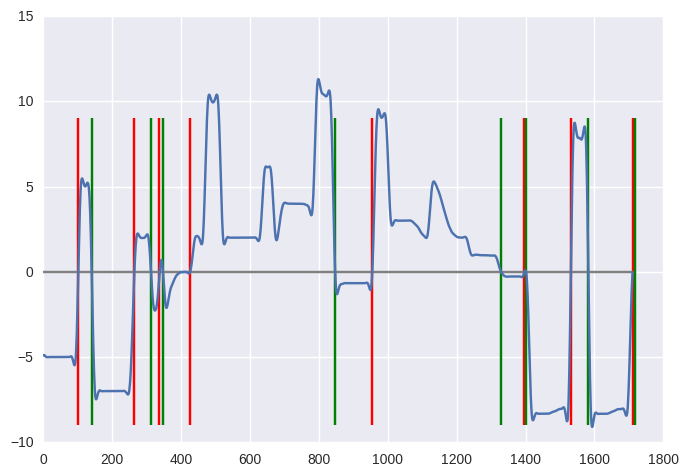

In [81]:
plt.plot(wps[ws:we])
plt.vlines(x=start -ws, ymin=-9, ymax = 9, color= 'red')
plt.vlines(x= end - ws, ymin=-9, ymax = 9, color= 'green')
plt.hlines(xmin=0,xmax=we-ws, y=0, color = 'grey')

In [61]:
end

array([], dtype=int64)

In [62]:
start

array([], dtype=int64)

In [56]:
bw.chroms()['5']

181538259L